# **problem statement **
[link text](https://drive.google.com/file/d/1TvBE_vXAFZ4FYiDN0U8IY_cVGDJQMMo_/view)

# Q1. Define data mining in your own words and give a real-world example.

Data mining is the process of extracting useful patterns, trends, and knowledge from large amounts of data using statistical, machine learning, and database techniques.

Example: An online store analyzing purchase history to recommend products (like Amazon’s "Customers who bought this also bought…").

# Q2. Differentiate between structured and unstructured data with examples.

Structured Data: Organized in rows & columns, easy to store in databases.
Example: Customer info (Name, Age, Salary) in a spreadsheet.

Unstructured Data: No fixed format, harder to analyze.
Example: Emails, videos, social media posts, images.

**Q3. Four types of data attributes with examples:**

Nominal (categories, no order): Example → Gender (Male, Female).

Ordinal (order, no exact difference): Example → Education Level (High School < Bachelor < Master).

Interval (equal spacing, no true zero): Example → Temperature in °C.

Ratio (equal spacing, true zero): Example → Age, Income.

# Q4. Common issues in data collection (3 examples):

Missing data – Not all values are recorded.

Inconsistent data – Different formats (e.g., date written as "01/02/25" vs "2025-02-01").

Duplicate data – Same record stored multiple times.
# New Section
Q5. Steps of data preprocessing (with importance):

Data cleaning – Fix missing, duplicate, or inconsistent data.

Data integration – Combine data from multiple sources.

Data transformation – Normalize/scale data for ML algorithms.

Data reduction – Remove irrelevant features, reduce dimensionality.

Data discretization – Convert continuous data into categories if needed.

Each step ensures quality and usability for analysis.

# Q6. Predictive vs Descriptive tasks in data mining:

Predictive (future-focused): Uses current data to predict unknown/future outcomes.
Example: Predicting loan default risk.

Descriptive (past-focused): Summarizes existing data to find patterns.
Example: Market basket analysis (which products are often bought together).

# Q7. Core data mining tasks (4 examples):

Classification: Assign data to predefined classes (spam vs not spam).

Clustering: Group similar items (customer segmentation).

Regression: Predict continuous values (house prices).

Association Rule Mining: Find relationships (if X → then Y, like "bread → butter").

# Q8. Attribute vs Measurement:

Attribute: A property or feature of an object.
Example: Height of a student.

Measurement: The actual recorded value of the attribute.
Example: 175 cm.

# Q9. Common evaluation metrics in supervised learning:

Accuracy

Precision

Recall (Sensitivity)

F1 Score

ROC-AUC

# Q10. Ethical concerns in data mining:

Privacy → Protecting personal data.

Bias → Avoid unfair predictions.

Transparency → Users should know how data is used.

Security → Prevent misuse of sensitive information.

## Create and load dataset




In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic data for a hypothetical online store
np.random.seed(42) # for reproducibility
num_customers = 200

# Numerical features
age = np.random.randint(18, 65, size=num_customers)
annual_income = np.random.normal(loc=50000, scale=20000, size=num_customers).clip(10000) # Ensure income is at least 10000
spending_score = np.random.randint(1, 100, size=num_customers).astype(float) # Convert to float to allow for NaN
purchase_frequency = np.random.randint(1, 15, size=num_customers)

# Categorical features
gender = np.random.choice(['Male', 'Female'], size=num_customers)
preferred_category = np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Books'], size=num_customers)

# Introduce missing values in numerical features (e.g., income and spending_score)
missing_income_indices = np.random.choice(num_customers, size=int(num_customers * 0.05), replace=False)
annual_income[missing_income_indices] = np.nan

missing_spending_indices = np.random.choice(num_customers, size=int(num_customers * 0.03), replace=False)
spending_score[missing_spending_indices] = np.nan

# Create DataFrame
data = {
    'Age': age,
    'Annual Income (USD)': annual_income,
    'Spending Score (1-100)': spending_score,
    'Purchase Frequency (Monthly)': purchase_frequency,
    'Gender': gender,
    'Preferred Category': preferred_category
}
df = pd.DataFrame(data)

# Add a derived feature: Estimated Annual Spending (Income * Spending Score / 100)
# Handle potential NaNs from Annual Income or Spending Score
df['Estimated Annual Spending'] = (df['Annual Income (USD)'] * df['Spending Score (1-100)'] / 100)

# Display the first 10 rows
display(df.head(10))

,Age,Annual Income (USD),Spending Score (1-100),Purchase Frequency (Monthly),Gender,Preferred Category,Estimated Annual Spending
0,56,49628.983910,NaN,1,Female,Home Goods,NaN
1,46,16529.907560,96.0,2,Male,Electronics,15868.711258
2,32,28549.363311,37.0,9,Male,Clothing,10563.264425
3,60,30148.276412,12.0,3,Male,Electronics,3617.793169
4,25,52046.953651,55.0,1,Male,Home Goods,28625.824508
5,38,41347.814389,13.0,5,Female,Home Goods,5375.215871
6,56,36816.353951,23.0,7,Female,Home Goods,8467.761409
7,36,50078.746089,89.0,6,Female,Electronics,44570.084019
8,40,59555.081989,99.0,12,Female,Electronics,58959.531169
9,28,44819.427105,30.0,1,Male,Electronics,13445.828132


In [ ]:
df.shape


(200, 7)

In [ ]:
df.columns

Index(['Age', 'Annual Income (USD)', 'Spending Score (1-100)',
       'Purchase Frequency (Monthly)', 'Gender', 'Preferred Category',
       'Estimated Annual Spending'],
      dtype='object')

In [ ]:
df.describe()

,Age,Annual Income (USD),Spending Score (1-100),Purchase Frequency (Monthly),Estimated Annual Spending
count,200.000000,190.000000,194.000000,200.000000,184.000000
mean,41.570000,53110.189319,47.386598,7.185000,24963.837486
std,13.715527,19510.788193,27.914377,4.158998,18532.069321
min,18.000000,10100.768569,1.000000,1.000000,379.219126
25%,30.000000,38067.888375,21.500000,3.000000,9766.081202
50%,42.000000,51862.443017,46.500000,7.000000,20281.240338
75%,54.000000,67563.876473,71.000000,11.000000,40085.008364
max,64.000000,104688.443181,99.000000,14.000000,80395.526794


In [ ]:
df.isnull().sum()

,0
Age,0
Annual Income (USD),10
Spending Score (1-100),6
Purchase Frequency (Monthly),0
Gender,0
Preferred Category,0
Estimated Annual Spending,16


### Strategy 1: Fill missing values with the mean

In [ ]:
# Fill missing numerical values with the mean of the respective columns
df_filled_mean = df.copy() # Create a copy to avoid modifying the original DataFrame
numerical_cols_with_missing = ['Annual Income (USD)', 'Spending Score (1-100)', 'Estimated Annual Spending']

for col in numerical_cols_with_missing:
    mean_val = df_filled_mean[col].mean()
    df_filled_mean[col].fillna(mean_val, inplace=True)

print("DataFrame after filling missing values with the mean:")
display(df_filled_mean.isnull().sum())

DataFrame after filling missing values with the mean:


/tmp/ipython-input-2400189981.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_mean[col].fillna(mean_val, inplace=True)


,0
Age,0
Annual Income (USD),0
Spending Score (1-100),0
Purchase Frequency (Monthly),0
Gender,0
Preferred Category,0
Estimated Annual Spending,0


### Strategy 2: Drop rows with missing values

In [ ]:
# Drop rows with any missing values
df_dropped = df.copy() # Create a copy to avoid modifying the original DataFrame
initial_rows = df_dropped.shape[0]
df_dropped.dropna(inplace=True)

print(f"\nDataFrame after dropping rows with missing values (Initial rows: {initial_rows}, Rows after dropping: {df_dropped.shape[0]}):")
display(df_dropped.isnull().sum())


DataFrame after dropping rows with missing values (Initial rows: 200, Rows after dropping: 184):


,0
Age,0
Annual Income (USD),0
Spending Score (1-100),0
Purchase Frequency (Monthly),0
Gender,0
Preferred Category,0
Estimated Annual Spending,0


## Visualize data with scatter plots

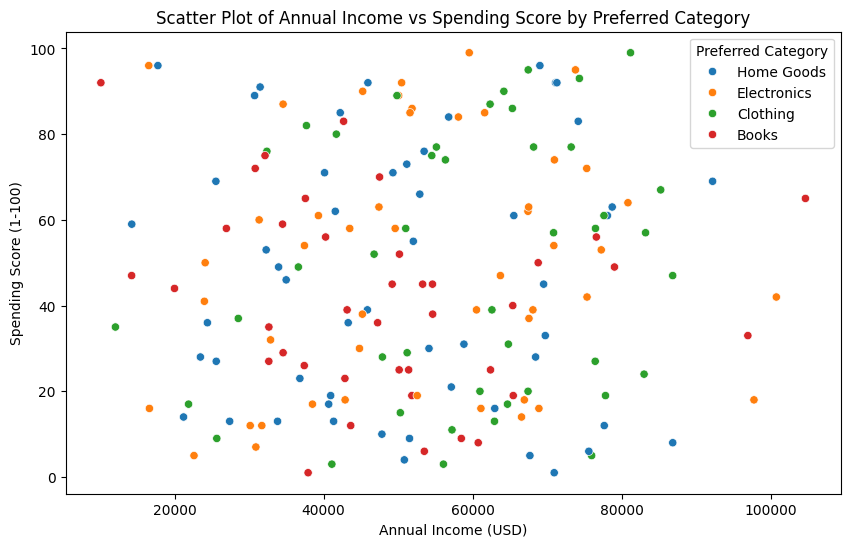

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select meaningful numerical features for visualization
numerical_features_meaningful = ['Annual Income (USD)', 'Spending Score (1-100)', 'Estimated Annual Spending', 'Age']

# Select a categorical feature for coloring
categorical_feature_meaningful = 'Preferred Category'

# Create scatter plot for Annual Income vs Spending Score, colored by Preferred Category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (USD)', y='Spending Score (1-100)', hue=categorical_feature_meaningful)
plt.title('Scatter Plot of Annual Income vs Spending Score by Preferred Category')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Spending Score (1-100)')
plt.show()



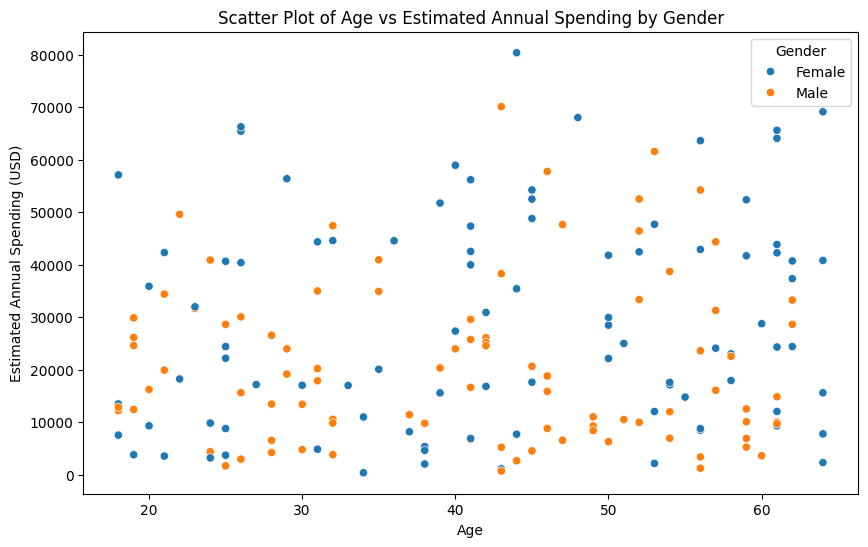

In [ ]:
# Create scatter plot for Age vs Estimated Annual Spending, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Estimated Annual Spending', hue='Gender')
plt.title('Scatter Plot of Age vs Estimated Annual Spending by Gender')
plt.xlabel('Age')
plt.ylabel('Estimated Annual Spending (USD)')
plt.show()